### 타이타닉 생존자 확인

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_excel('titanic.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [49]:
df=data[['pclass','sex','age','sibsp','parch','fare','survived']]
df.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,1,female,29.0000,0,0,211.3375,1
1,1,male,0.9167,1,2,151.5500,1
2,1,female,2.0000,1,2,151.5500,0
3,1,male,30.0000,1,2,151.5500,0
4,1,female,25.0000,1,2,151.5500,0


In [50]:
df.isna().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
survived      0
dtype: int64

In [51]:
df=df.dropna(axis=0)
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
survived    0
dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(df['sex'])
df['sex']=e.transform(df['sex'])
df.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,1,0,29.0000,0,0,211.3375,1
1,1,1,0.9167,1,2,151.5500,1
2,1,0,2.0000,1,2,151.5500,0
3,1,1,30.0000,1,2,151.5500,0
4,1,0,25.0000,1,2,151.5500,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1045 non-null   int64  
 1   sex       1045 non-null   int32  
 2   age       1045 non-null   float64
 3   sibsp     1045 non-null   int64  
 4   parch     1045 non-null   int64  
 5   fare      1045 non-null   float64
 6   survived  1045 non-null   int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 61.2 KB


In [54]:
X=df.iloc[:,0:6].values
y=df.iloc[:,6].values

In [66]:
X[:5],y[:5]

(array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375],
        [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ],
        [  1.    ,   0.    ,   2.    ,   1.    ,   2.    , 151.55  ],
        [  1.    ,   1.    ,  30.    ,   1.    ,   2.    , 151.55  ],
        [  1.    ,   0.    ,  25.    ,   1.    ,   2.    , 151.55  ]],
       dtype=float32),
 array([1, 1, 0, 0, 0], dtype=int64))

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
model=Sequential()
model.add(Dense(255, input_dim=6, activation='relu'))  #input
model.add(Dense(1, activation='sigmoid'))  #output
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)


Epoch 1/300
27/27 [==============================] - 1s 6ms/step - loss: 1.2065 - accuracy: 0.5730 - val_loss: 0.8536 - val_accuracy: 0.6507
Epoch 2/300
27/27 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.6555 - val_loss: 0.6069 - val_accuracy: 0.6890
Epoch 3/300
27/27 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.6806 - val_loss: 0.5707 - val_accuracy: 0.7081
Epoch 4/300
27/27 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.6758 - val_loss: 0.5569 - val_accuracy: 0.7368
Epoch 5/300
27/27 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.6962 - val_loss: 0.5892 - val_accuracy: 0.7225
Epoch 6/300
27/27 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7177 - val_loss: 0.5413 - val_accuracy: 0.7464
Epoch 7/300
27/27 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7022 - val_loss: 0.5424 - val_accuracy: 0.7799
Epoch 8/300
2

Epoch 59/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7799 - val_loss: 0.5126 - val_accuracy: 0.7656
Epoch 60/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7931 - val_loss: 0.4564 - val_accuracy: 0.8134
Epoch 61/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7859 - val_loss: 0.5087 - val_accuracy: 0.7751
Epoch 62/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7931 - val_loss: 0.4878 - val_accuracy: 0.7847
Epoch 63/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7859 - val_loss: 0.4619 - val_accuracy: 0.8038
Epoch 64/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7907 - val_loss: 0.4598 - val_accuracy: 0.8086
Epoch 65/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7847 - val_loss: 0.4676 - val_accuracy: 0.7990
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8050 - val_loss: 0.4616 - val_accuracy: 0.8230
Epoch 117/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7919 - val_loss: 0.4556 - val_accuracy: 0.8182
Epoch 118/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8050 - val_loss: 0.4509 - val_accuracy: 0.8086
Epoch 119/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7907 - val_loss: 0.4944 - val_accuracy: 0.8134
Epoch 120/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7811 - val_loss: 0.4997 - val_accuracy: 0.8230
Epoch 121/300
27/27 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7775 - val_loss: 0.4999 - val_accuracy: 0.7799
Epoch 122/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.8038 - val_loss: 0.4859 - val_accuracy: 0.7943
Epoch 123/300

27/27 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8086 - val_loss: 0.4497 - val_accuracy: 0.8086
Epoch 174/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8110 - val_loss: 0.4445 - val_accuracy: 0.8182
Epoch 175/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8098 - val_loss: 0.4463 - val_accuracy: 0.8134
Epoch 176/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8110 - val_loss: 0.4483 - val_accuracy: 0.8134
Epoch 177/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8062 - val_loss: 0.4432 - val_accuracy: 0.8230
Epoch 178/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8050 - val_loss: 0.4444 - val_accuracy: 0.8134
Epoch 179/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8062 - val_loss: 0.4908 - val_accuracy: 0.8182
Epoch 180/300

27/27 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7883 - val_loss: 0.5108 - val_accuracy: 0.7799
Epoch 231/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8062 - val_loss: 0.4727 - val_accuracy: 0.8230
Epoch 232/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8002 - val_loss: 0.4629 - val_accuracy: 0.8182
Epoch 233/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7859 - val_loss: 0.4762 - val_accuracy: 0.8038
Epoch 234/300
27/27 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7536 - val_loss: 0.4603 - val_accuracy: 0.8134
Epoch 235/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8002 - val_loss: 0.4764 - val_accuracy: 0.8182
Epoch 236/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8086 - val_loss: 0.4561 - val_accuracy: 0.8134
Epoch 237/300

27/27 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8170 - val_loss: 0.4605 - val_accuracy: 0.8182
Epoch 288/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8230 - val_loss: 0.4655 - val_accuracy: 0.8086
Epoch 289/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8062 - val_loss: 0.4659 - val_accuracy: 0.8182
Epoch 290/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8110 - val_loss: 0.4644 - val_accuracy: 0.8086
Epoch 291/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8110 - val_loss: 0.4602 - val_accuracy: 0.8182
Epoch 292/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8182 - val_loss: 0.4723 - val_accuracy: 0.8182
Epoch 293/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8122 - val_loss: 0.4578 - val_accuracy: 0.8134
Epoch 294/300

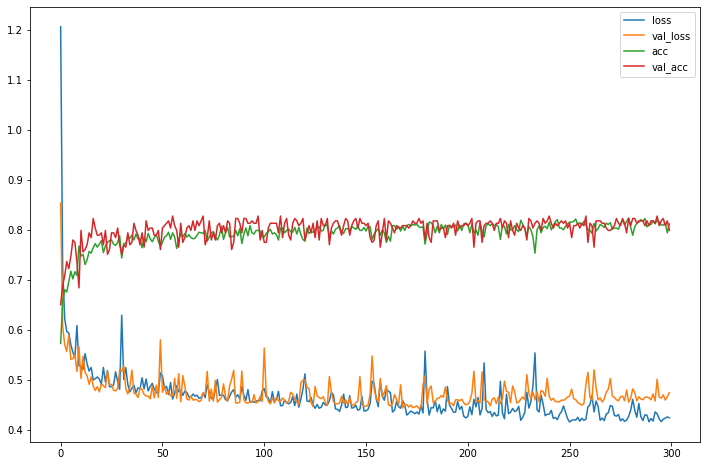

In [70]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [71]:
dicaprio = np.array([3., 1., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 0., 17., 1., 2., 100.]).reshape(1,6)

print(model.predict(dicaprio))
print(model.predict(winslet))

[[0.2764683]]
[[0.98844063]]
